In [ ]:
from pathlib import Path
from zipfile import ZipFile
import requests

URL="https://www.kaggle.com/api/v1/datasets/download/yasserh/titanic-dataset"
TITANIC_ZIP = "titanic.zip"
titanic_path = Path(TITANIC_ZIP)
if not titanic_path.exists():
    data = requests.get(URL)
    with open(TITANIC_ZIP,"wb") as f:
        f.write(data.content)
    with open(TITANIC_ZIP, 'rb') as f:
        ZipFile(f).extractall()
    print('Bestand is gedownload en uitgepakt')
else:
    print('Bestand bestaat al')


In [6]:
import pandas as pd
TITANIC_CSV = "Titanic-Dataset.csv"
df = pd.read_csv(TITANIC_CSV)
df = df[['Survived', 'Sex', 'Pclass', 'Age']]
df['Sex'] = df.Sex.astype('category')
df['Survived'] = df.Survived.astype(pd.BooleanDtype())

Survived           False      True 
Pclass Sex                         
1      female   3.191489  96.808511
       male    63.114754  36.885246
2      female   7.894737  92.105263
       male    84.259259  15.740741
3      female       50.0       50.0
       male    86.455331  13.544669

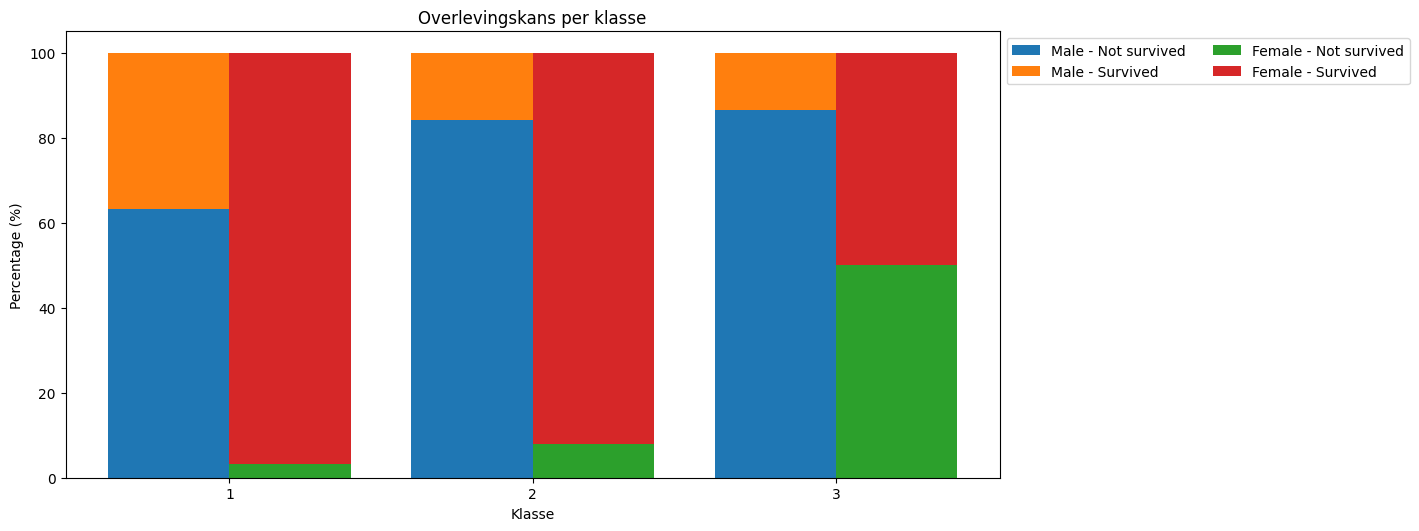

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plot_df = (
    df.groupby(['Pclass', 'Sex'], observed=True)['Survived']
      .value_counts(normalize=True)
      .unstack(fill_value=0)
      * 100
)
display(plot_df)

# Identify survival columns safely
not_survived_col = plot_df.columns[0]
survived_col = plot_df.columns[1]

classes = plot_df.index.get_level_values('Pclass').unique()
x = np.arange(len(classes))
bar_width = 0.4   # male + female touch

plt.figure(figsize=(10, 5))

for i, sex in enumerate(['male', 'female']):
    subset = plot_df.xs(sex, level='Sex')

    offset = (-0.5 + i) * bar_width

    plt.bar(
        x + offset,
        subset[not_survived_col],
        width=bar_width,
        label=f'{sex.capitalize()} - Not survived'
    )

    plt.bar(
        x + offset,
        subset[survived_col],
        width=bar_width,
        bottom=subset[not_survived_col],
        label=f'{sex.capitalize()} - Survived'
    )

# Formatting
plt.xticks(x, classes)

plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncols=2)
plt.xlabel('Klasse')
plt.title('Overlevingskans per klasse')
plt.ylabel('Percentage (%)')
plt.show()